# Predictive modeling: Decision Tree based Modeling.

# Predicting a driver's final position

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

circuits = pd.read_csv("circuits.csv")
constructor = pd.read_csv("constructors.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
sprint_results = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")

**Total pit stops per race/driver**

Total Racing time for each driver

In [16]:
pit_counts = pit_stops.groupby(['raceId', 'driverId']).size().rename('num_pit_stops')

lap_times['milliseconds'] = lap_times['milliseconds'].fillna(0)
lap_sums = lap_times.groupby(['raceId', 'driverId'])['milliseconds'].sum().rename('total_race_time')

results['dnf'] = results['statusId'].apply(lambda x: 1 if x != 1 else 0)

features = results[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'dnf']]

features = features.join(pit_counts, on=['raceId', 'driverId'])
features = features.join(lap_sums, on=['raceId', 'driverId'])

features = features.dropna()

features = features[features['positionOrder'] > 0]

x = features[['grid', 'num_pit_stops', 'total_race_time']]
y = features['positionOrder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


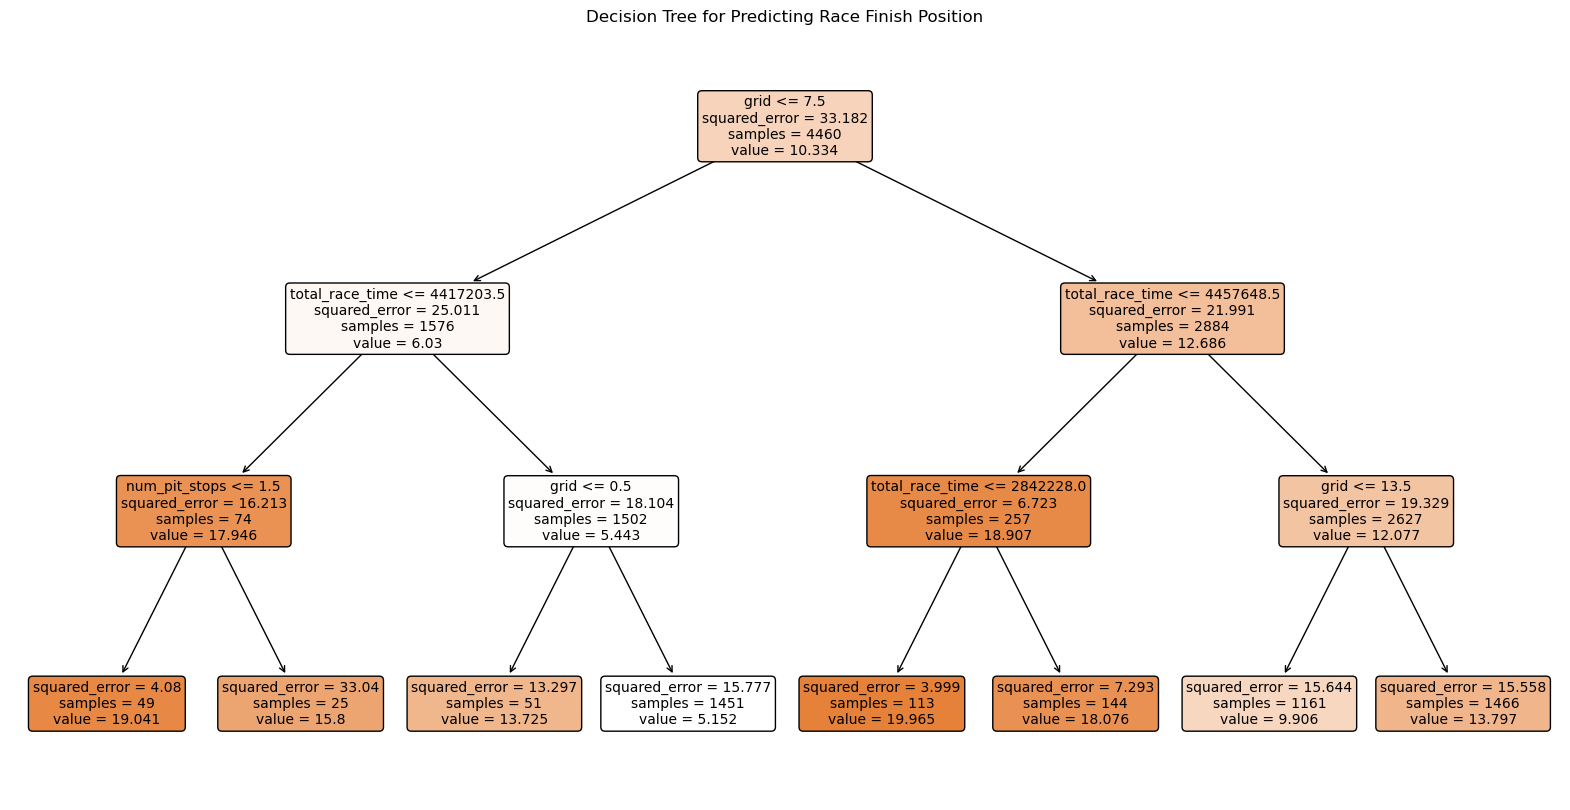

In [19]:
tree = DecisionTreeRegressor( max_depth=3, random_state=42)
tree.fit(x_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=list(x.columns),filled=True, rounded=True,fontsize=10)
plt.title("Decision Tree for Predicting Race Finish Position")
plt.show()